##  Imports

In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [15]:
base = 'https://api.coingecko.com/api/v3/'

In [28]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

result = requests.get(url)
j_bc = result.json()

df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc.head(10)

,time,price
0,1558252943693,7928.000879
1,1558256539612,7927.909969
2,1558260156040,7976.889662
3,1558263642291,8069.475156
4,1558267390512,7962.146528
5,1558270981209,7919.202962
6,1558274570695,7874.016647
7,1558278174461,7913.198385
8,1558281677155,7944.556758
9,1558285247185,7911.711096


In [31]:
url = base + 'coins/dogecoin/market_chart'
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}

result = requests.get(url, params=param_dict)

j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1558252816141,0.003124
1,1558256417389,0.003138
2,1558260027068,0.003114
3,1558263609262,0.003143
4,1558267221544,0.003099
5,1558270951139,0.003127
6,1558274417675,0.003083
7,1558278150319,0.003131
8,1558281609356,0.003135
9,1558285208907,0.003161


In [29]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2019-05-19 08:02:23.693,7928.000879
2019-05-19 09:02:19.612,7927.909969
2019-05-19 10:02:36.040,7976.889662
2019-05-19 11:00:42.291,8069.475156
2019-05-19 12:03:10.512,7962.146528
2019-05-19 13:03:01.209,7919.202962
2019-05-19 14:02:50.695,7874.016647
2019-05-19 15:02:54.461,7913.198385
2019-05-19 16:01:17.155,7944.556758


In [32]:
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2019-05-19 08:00:16.141,0.003124
2019-05-19 09:00:17.389,0.003138
2019-05-19 10:00:27.068,0.003114
2019-05-19 11:00:09.262,0.003143
2019-05-19 12:00:21.544,0.003099
2019-05-19 13:02:31.139,0.003127
2019-05-19 14:00:17.675,0.003083
2019-05-19 15:02:30.319,0.003131
2019-05-19 16:00:09.356,0.003135


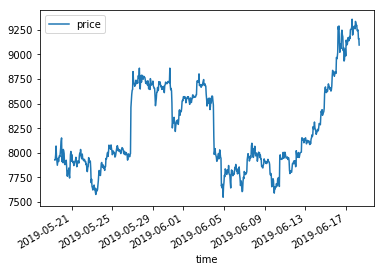

In [30]:
df_bc.plot()

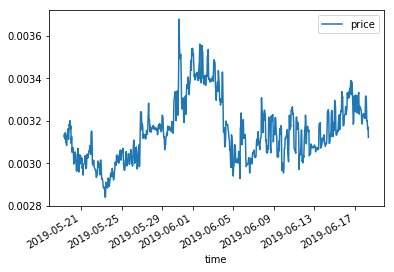

In [33]:
df_dc.plot()

# Top Ten Coins Report

## List the first 10 coingecko currencies in a DataFrame

In [7]:
# List of coins

url = base + 'coins/list'

result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,name,symbol
0,01coin,01coin,zoc
1,02-token,O2 Token,o2t
2,0chain,0chain,zcn
3,0x,0x,zrx
4,0xcert,0xcert,zxc
5,10m-token,10M Token,10mt
6,1337,Elite,1337
7,1irstcoin,1irstcoin,fst
8,1million-token,1Million Token,1mt
9,1sg,1SG,1sg


In [8]:
data_df = df_list.iloc[:10, 0]
data_df

0            01coin
1          02-token
2            0chain
3                0x
4            0xcert
5         10m-token
6              1337
7         1irstcoin
8    1million-token
9               1sg
Name: id, dtype: object

In [1]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_series = pd.concat(data_list)
data_series

NameError: name 'data_df' is not defined

In [10]:
data_df = pd.DataFrame(data_series)

In [11]:
type(data_df)

pandas.core.frame.DataFrame

## Make a csv called 'top_ten_report.csv' and check that it worked

In [12]:
data_df.set_index('date_time', inplace=True)

In [34]:
data_df.head()

,price,file_name
date_time,,
1536969600000,0.009788,01coin
1537056000000,0.009883,01coin
1537142400000,0.012145,01coin
1537228800000,0.007965,01coin
1537315200000,0.011866,01coin


In [13]:
data_df.to_csv('top_ten_report.csv', )

In [14]:
check = pd.read_csv('top_ten_report.csv')
check

,date_time,price,file_name
0,1536969600000,0.009788,01coin
1,1537056000000,0.009883,01coin
2,1537142400000,0.012145,01coin
3,1537228800000,0.007965,01coin
4,1537315200000,0.011866,01coin
5,1537401600000,0.011457,01coin
6,1537488000000,0.009856,01coin
7,1537574400000,0.010346,01coin
8,1537660800000,0.012510,01coin
9,1537747200000,0.008730,01coin
